In [5]:
# Importing the requiered libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

n_months = 34


In [3]:
# Importing the datasets
train = pd.read_csv('sales_train.csv', encoding='utf8')
test = pd.read_csv('test.csv', encoding='utf8')

In [4]:
#data processing
data = train.groupby(["date_block_num"])["item_cnt_day"].sum()
data.index=pd.date_range(start = '2013-01-01',end='2015-10-01', freq = 'MS')
data=data.reset_index()
data.columns = ['ds','y']

#split data 80-20
split = int(0.8*len(data))+1
print(f'train months {split}')
train_data = data.iloc[:split]
test_data = data.iloc[split:]


train months 28


In [18]:
test_data['y']

28    72295.0
29    64114.0
30    63187.0
31    66079.0
32    72843.0
33    71056.0
Name: y, dtype: float64

In [8]:
train_data['y']

0     131479.0
1     128090.0
2     147142.0
3     107190.0
4     106970.0
5     125381.0
6     116966.0
7     125291.0
8     133332.0
9     127541.0
10    130009.0
11    183342.0
12    116899.0
13    109687.0
14    115297.0
15     96556.0
16     97790.0
17     97429.0
18     91280.0
19    102721.0
20     99208.0
21    107422.0
22    117845.0
23    168755.0
24    110971.0
25     84198.0
26     82014.0
27     77827.0
Name: y, dtype: float64

In [30]:
### HWES model with Additive Trend and Additive Seasonal
HWES_add_model = ExponentialSmoothing(train_data['y'],trend='add',seasonal='add',seasonal_periods=12).fit()

train_add = HWES_add_model.fittedvalues

pred_add = HWES_add_model.forecast(6)

/Users/sarponal/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [34]:
### HWES model with Multiplicative Trend and Additive Seasonal
HWES_mul1_model = ExponentialSmoothing(train_data['y'],trend='mul',seasonal='add',seasonal_periods=12).fit()

train_mul1 = HWES_mul1_model.fittedvalues

pred_mul1 = HWES_mul1_model.forecast(6)

/Users/sarponal/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/sarponal/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [35]:
### HWES model with Multiplicative Trend and Multiplicative Seasonal
HWES_mul2_model = ExponentialSmoothing(train_data['y'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

train_mul2 = HWES_mul2_model.fittedvalues

pred_mul2 = HWES_mul2_model.forecast(6)

/Users/sarponal/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


## Calculating the Test RMSE Scores

In [37]:
rmse = np.sqrt(mean_squared_error(test_data['y'],pred_add))
print('HWES_ADD_RMSE: %.1f' % rmse)

HWES_ADD_RMSE: 13781.3


In [38]:
rmse = np.sqrt(mean_squared_error(test_data['y'],pred_mul1))
print('HWES_MUL1_RMSE: %.1f' % rmse)

HWES_MUL1_RMSE: 17006.6


In [39]:
rmse = np.sqrt(mean_squared_error(test_data['y'],pred_mul2))
print('HWES_MUL2_RMSE: %.1f' % rmse)

HWES_MUL2_RMSE: 17376.9


## Plotting the Monthly forecast of total number of sold products by HWES

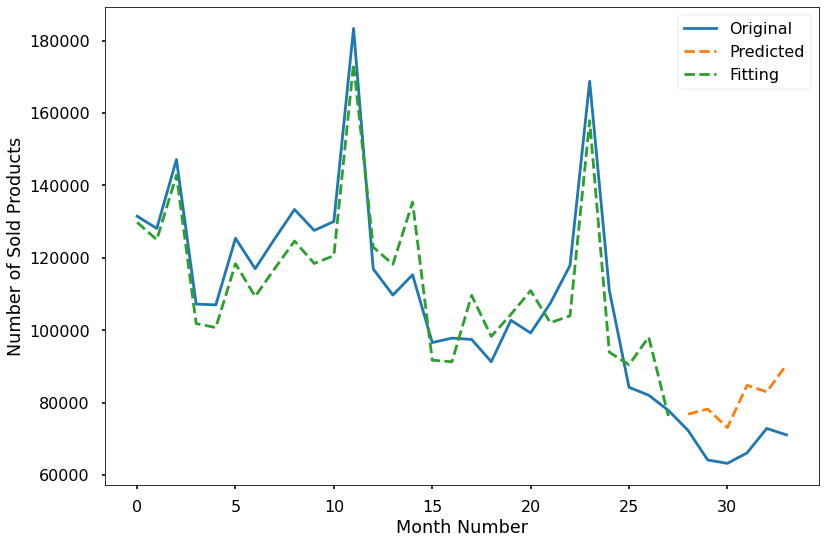

In [36]:
### HWES model with Additive Trend and Additive Seasonal
plt.style.use('seaborn-poster')
plt.figure()
plt.plot(data['y'], label='Original')
plt.plot(pred_add, ls='--', label="Predicted")
plt.plot(train_add, ls='--', label="Fitting")
plt.legend(loc='best')
plt.xlabel('Month Number')
plt.ylabel('Number of Sold Products')
plt.show()

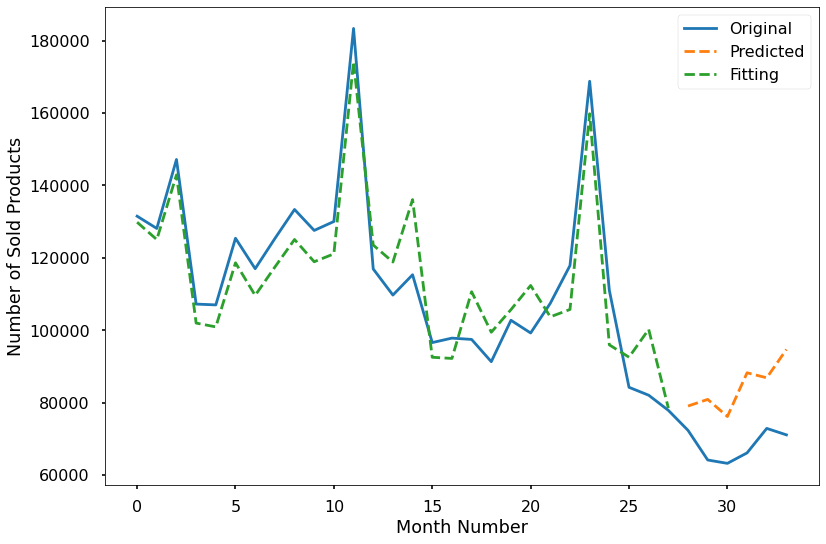

In [40]:
### HWES model with Additive Trend and Multiplicative Seasonal
plt.style.use('seaborn-poster')
plt.figure()
plt.plot(data['y'], label='Original')
plt.plot(pred_mul1, ls='--', label="Predicted")
plt.plot(train_mul1, ls='--', label="Fitting")
plt.legend(loc='best')
plt.xlabel('Month Number')
plt.ylabel('Number of Sold Products')
plt.show()

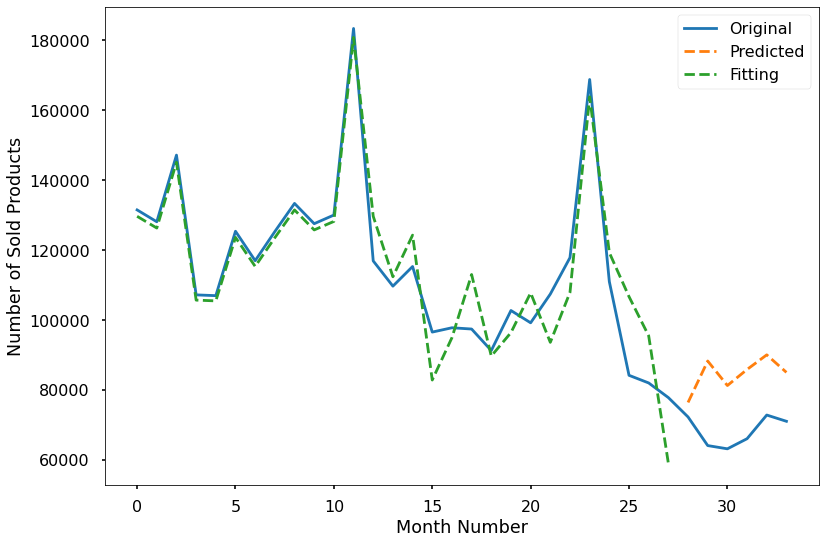

In [41]:
#### HWES model with Multiplicative Trend and Multiplicative Seasonal
plt.style.use('seaborn-poster')
plt.figure()
plt.plot(data['y'], label='Original')
plt.plot(pred_mul2, ls='--', label="Predicted")
plt.plot(train_mul2, ls='--', label="Fitting")
plt.legend(loc='best')
plt.xlabel('Month Number')
plt.ylabel('Number of Sold Products')
plt.show()